In [0]:
#@title Download Dataset to Google Colab { form-width: "800px" }

# e.g GOOGLE_DRIVE_FILE_URL: https://drive.google.com/open?id=1CZyDkHHjS8SUVBF7fBwoTAF6xSpLmD4P7
LinkFile = "https://drive.google.com/open?id=1yLwubKQ5COoaPXV8H-rF4Tfe0kYu9oq1" #@param {type:"string"}

# e.g GOOGLE_DRIVE_FILENAME_WITH_EXTENSION: Local History.csv
Filename = "user.csv" #@param {type:"string"}

Filename = Filename.replace(' ', '\ ')

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = LinkFile.split('=')[-1]
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(Filename) 

In [0]:
import pandas as pd
import numpy as np

In [0]:
# df = pd.read_csv('../dataset/tables-csv/user.csv')
df = pd.read_csv('user.csv')
df.head()

,user_id,semester_id,class_number,course_id,course_name,inst_id_curr,inst_name_curr,high_school_name,school_type,shift,graduation_year,has_pc,has_internet,speed_internet,prev_exp_lang,language,worked,company_name,share_pc,year_started_work,year_stoped_work,other_degree,inst_name_prev,name_other_degree,year_started_prev_degree,year_stoped_prev_degree,sex,year_birth,civil_status,have_kids
0,2016-1#102#1088,2016-1,102,13,Física - Bacharelado,1,Universidade Federal do Amazonas,Escola Estadual Prof Ruth Prestes,public school,morning shift,2012.0,yes,yes,high-speed,yes,C,yes,Nokia,no,2015.0,2016.0,no,NaN,NaN,NaN,NaN,NaN,NaN,single,no
1,2016-1#102#1175,2016-1,102,8,Engenharia de Materiais,1,Universidade Federal do Amazonas,Fucapi,private school,morning shift,2015.0,yes,yes,high-speed,no,NaN,no,NaN,yes,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,single,no
2,2016-1#102#1278,2016-1,102,7,Engenharia Mecânica,1,Universidade Federal do Amazonas,Centro Educacional La Salle,private school,NaN,2012.0,yes,yes,high-speed,yes,C,yes,Editora Aufiero,no,2015.0,2016.0,no,NaN,NaN,NaN,NaN,NaN,NaN,single,no
3,2016-1#102#1279,2016-1,102,7,Engenharia Mecânica,1,Universidade Federal do Amazonas,Colegio Militar da Policia Militar,public school,morning shift,2015.0,yes,yes,high-speed,yes,"C,C++",no,NaN,yes,NaN,NaN,yes,IFAM,Analise e Desenvolvimento de Sistema,2016.0,2016.0,male,1997.0,single,no
4,2016-1#102#1280,2016-1,102,7,Engenharia Mecânica,1,Universidade Federal do Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Análise das features do dataset

In [0]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,30
Number of observations,2566
Total Missing (%),27.5%
Total size in memory,601.5 KiB
Average record size in memory,240.0 B
Numeric,8
Categorical,19
Boolean,0
Date,0
Text (Unique),1
Rejected,2


In [0]:
df.shape

(2566, 30)

In [0]:
df.columns

Index(['user_id', 'semester_id', 'class_number', 'course_id', 'course_name',
       'inst_id_curr', 'inst_name_curr', 'high_school_name', 'school_type',
       'shift', 'graduation_year', 'has_pc', 'has_internet', 'speed_internet',
       'prev_exp_lang', 'language', 'worked', 'company_name', 'share_pc',
       'year_started_work', 'year_stoped_work', 'other_degree',
       'inst_name_prev', 'name_other_degree', 'year_started_prev_degree',
       'year_stoped_prev_degree', 'sex', 'year_birth', 'civil_status',
       'have_kids'],
      dtype='object')

## Valores nulos 

### Quantidade de valores não nulos por feature

In [0]:
df.count()

user_id                     2566
semester_id                 2566
class_number                2566
course_id                   2566
course_name                 2566
inst_id_curr                2566
inst_name_curr              2566
high_school_name            1793
school_type                 2426
shift                       2403
graduation_year             2426
has_pc                      2426
has_internet                2031
speed_internet              1935
prev_exp_lang               2426
language                     818
worked                      2426
company_name                 467
share_pc                    2031
year_started_work            640
year_stoped_work             636
other_degree                2426
inst_name_prev               302
name_other_degree            302
year_started_prev_degree     417
year_stoped_prev_degree      417
sex                         2136
year_birth                  2136
civil_status                2426
have_kids                   2426
dtype: int

### Quantidade de valores nulos por feature

In [0]:
null_values = df.isnull().sum().sort_values(ascending=True)
null_labels = null_values.keys()
null_values

user_id                        0
semester_id                    0
class_number                   0
course_id                      0
course_name                    0
inst_id_curr                   0
inst_name_curr                 0
other_degree                 140
worked                       140
civil_status                 140
has_pc                       140
prev_exp_lang                140
have_kids                    140
school_type                  140
graduation_year              140
shift                        163
year_birth                   430
sex                          430
has_internet                 535
share_pc                     535
speed_internet               631
high_school_name             773
language                    1748
year_started_work           1926
year_stoped_work            1930
company_name                2099
year_started_prev_degree    2149
year_stoped_prev_degree     2149
inst_name_prev              2264
name_other_degree           2264
dtype: int

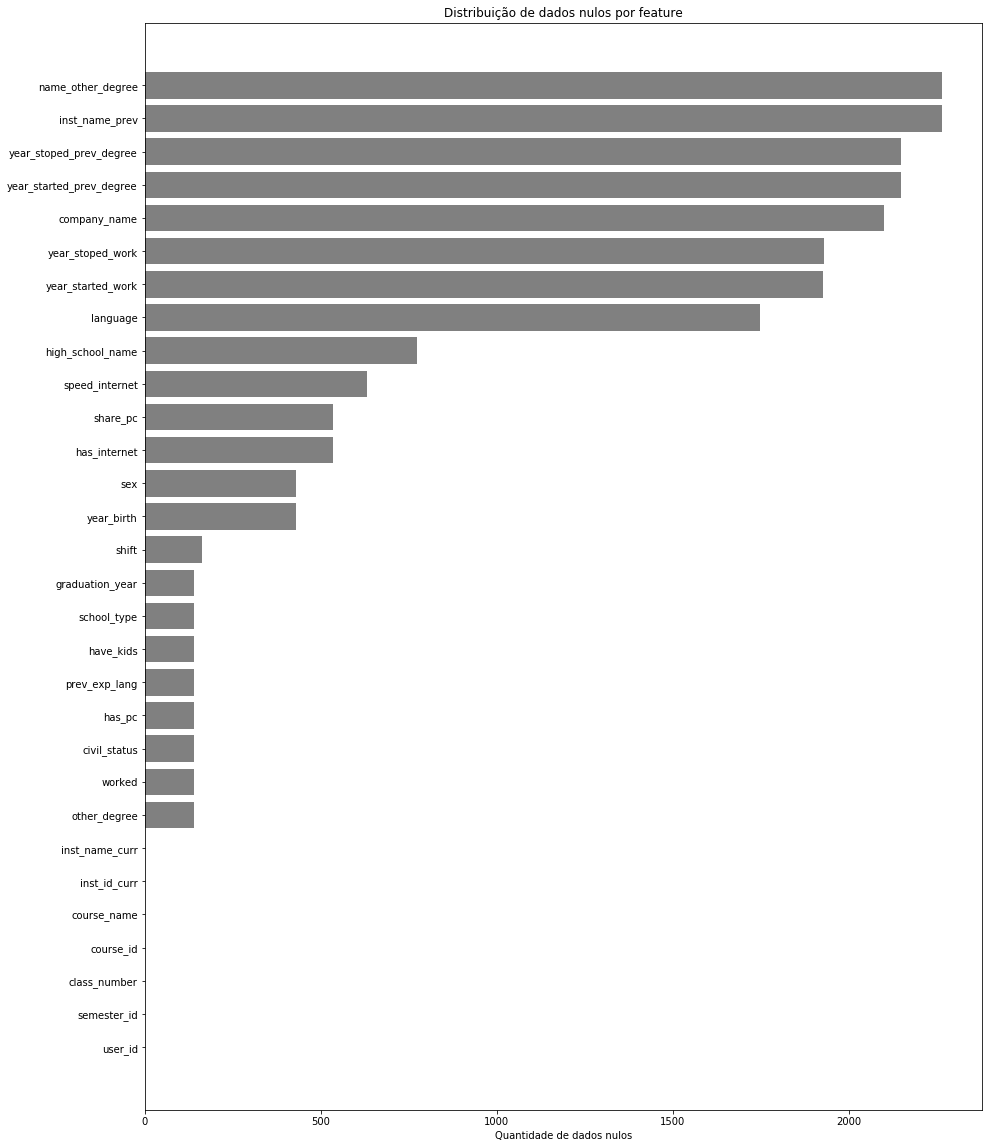

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 20))
plt.title('Distribuição de dados nulos por feature')
plt.xlabel('Quantidade de dados nulos')
plt.barh(null_labels, null_values, color='gray')
plt.show()


## Distribuição de alunos por curso

In [0]:
course_name_amount = df['course_name'].value_counts()
labels = course_name_amount.keys()
course_counts = course_name_amount.values
course_name_amount

Engenharia de Materiais                              240
Engenharia Mecânica                                  230
Engenharia Elétrica                                  219
Matemática - Licenciatura Noturno                    218
Física - Bacharelado                                 215
Engenharia Química                                   206
Estatística                                          194
Engenharia de Petróleo e Gás                         188
Engenharia de Produção                               168
Física - Licenciatura                                165
Ciência da Computação                                138
Matemática - Bacharelado                             118
Matemática - Licenciatura Diurno                      78
Matemática Aplicada                                   70
Sistemas de Informação                                35
Geologia                                              27
Engenharia da Computação                              26
Pós-graduação em Informática   

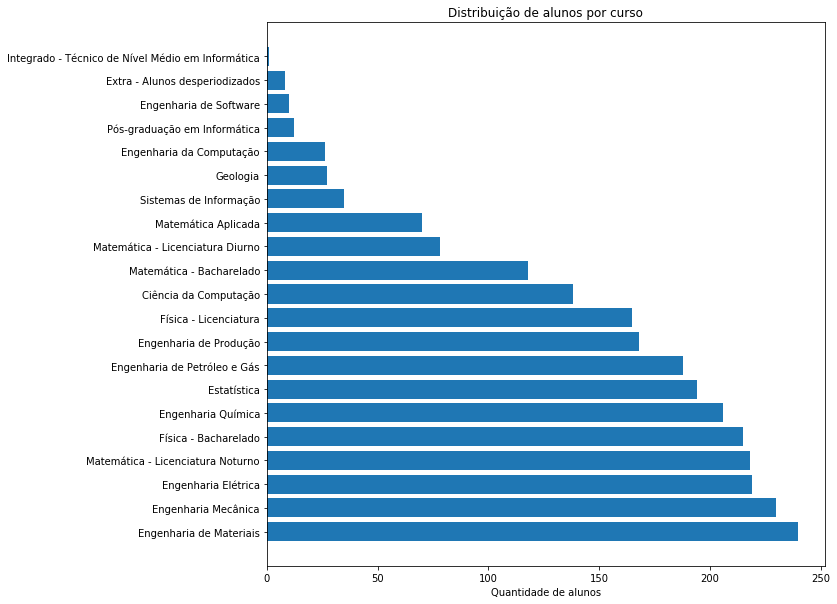

In [0]:
plt.figure(figsize=(10, 10))
plt.barh(labels, course_counts)
plt.title('Distribuição de alunos por curso')
plt.xlabel('Quantidade de alunos')
plt.show()

## Informações sobre internet e PCs

### Quantidade de usuário com pc, interne e sua velocidade

In [0]:
df1 = df[['has_pc', 'share_pc', 'has_internet', 'speed_internet']]
df1.count()

has_pc            2426
share_pc          2031
has_internet      2031
speed_internet    1935
dtype: int64

### Percentual de alunos com pc, internet, velocidade da conexão e se compartilham o pc

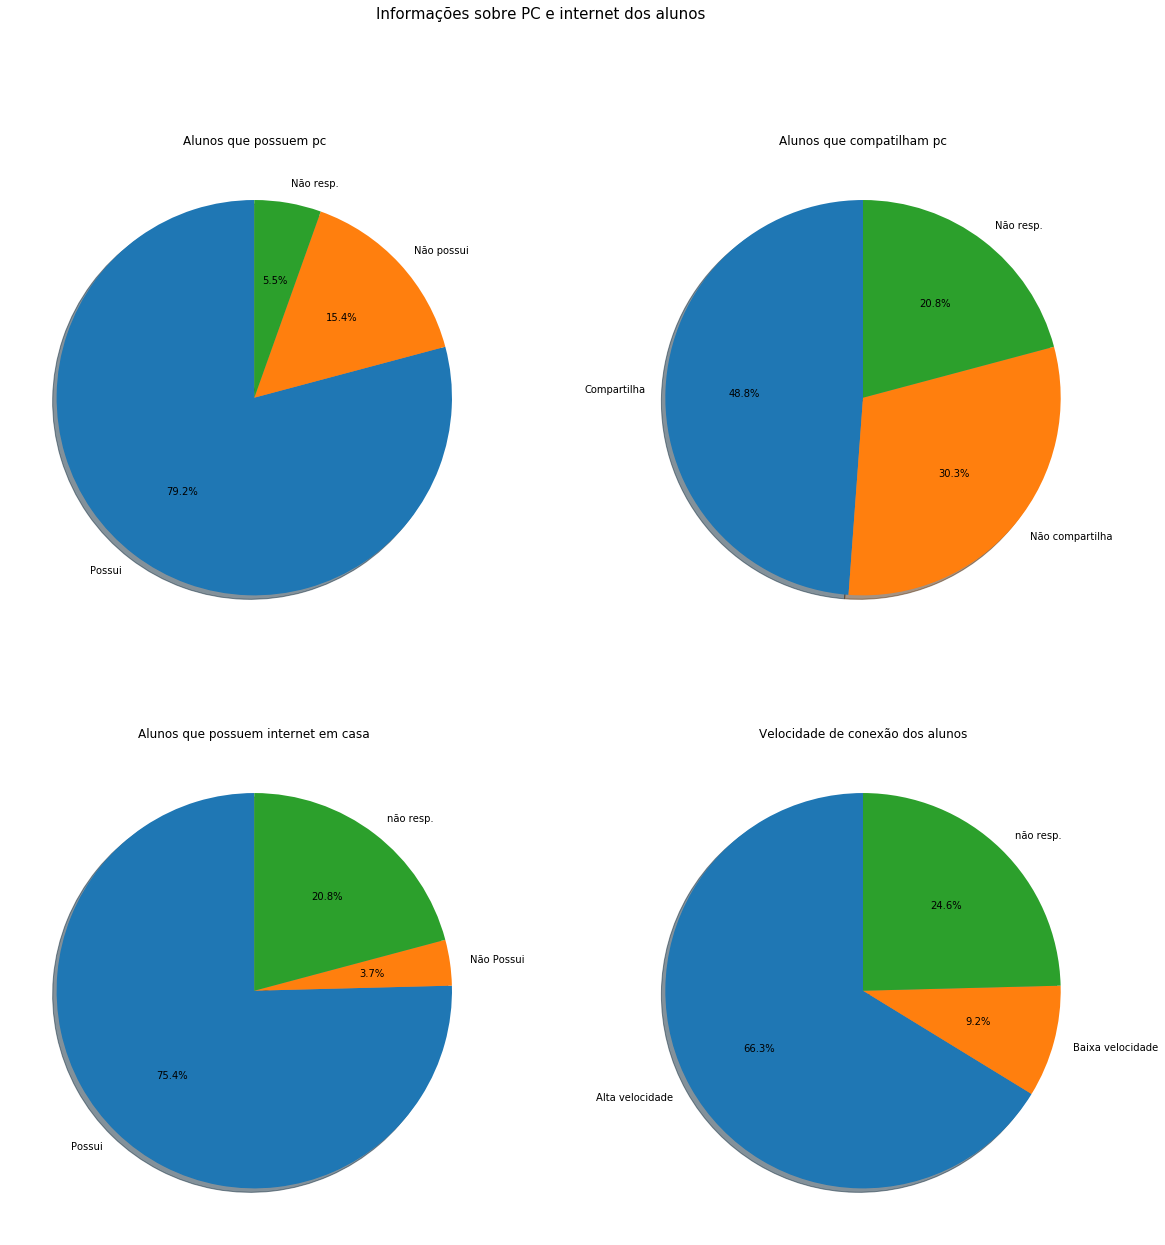

In [0]:
figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
figs.suptitle('Informações sobre PC e internet dos alunos', size=15)

# graphic of has pc
values = list(df1['has_pc'].value_counts())
values.append(df1['has_pc'].isnull().sum())
labels = ['Possui', 'Não possui', 'Não resp.']
axes[0, 0].pie(x=values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[0, 0].set_title('Alunos que possuem pc')


# graphic of share pc
values = list(df1['share_pc'].value_counts())
values.append(df1['share_pc'].isnull().sum())
labels = ['Compartilha', 'Não compartilha', 'Não resp.']
axes[0, 1].pie(x=values, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[0, 1].set_title('Alunos que compatilham pc')

# grafic of has internet
values = list(df1['has_internet'].value_counts())
values.append(df1['has_internet'].isnull().sum())
labels = ['Possui', 'Não Possui', 'não resp.']
axes[1, 0].pie(x=values, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[1, 0].set_title('Alunos que possuem internet em casa')

# grafic of speed internet
values = list(df1['speed_internet'].value_counts())
values.append(df1['speed_internet'].isnull().sum())
labels = ['Alta velocidade', 'Baixa velocidade', 'não resp.']
axes[1, 1].pie(x=values, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[1, 1].set_title('Velocidade de conexão dos alunos')


plt.show()

### Retirando os valores nulos

In [0]:
df2 = df1[['has_pc', 'has_internet']]
df2 = df2[(df2['has_pc'].isnull() == False) &\
          (df2['has_internet'].isnull() == False)]
df2.count()

has_pc          2031
has_internet    2031
dtype: int64

### Usuários com e sem Internet e com PC

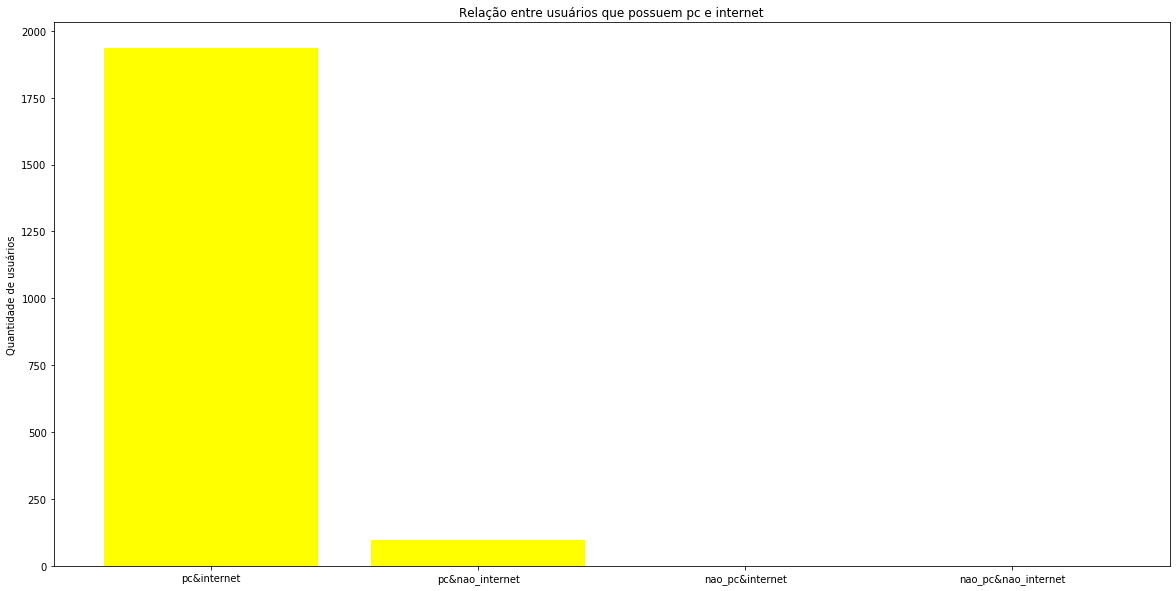

In [0]:
x_labels = ['pc&internet', 'pc&nao_internet', 'nao_pc&internet', 
            'nao_pc&nao_internet']

pc_internet = df2.loc[(df2['has_pc']=='yes') &\
                      (df2['has_internet']=='yes')].shape[0]
pc_nao_internet = df2.loc[(df2['has_pc']=='yes') &\
                      (df2['has_internet']=='no')].shape[0]
nao_pc_internet = df2.loc[(df2['has_pc']=='no') &\
                      (df2['has_internet']=='yes')].shape[0]
nao_pc_nao_internet = df2.loc[(df2['has_pc']=='no') &\
                      (df2['has_internet']=='no')].shape[0]

y = [pc_internet, pc_nao_internet, nao_pc_internet, nao_pc_nao_internet]

plt.figure(figsize=(20, 10))
plt.title('Relação entre usuários que possuem pc e internet')
plt.bar(x_labels, y, width=0.8, color='yellow')
#plt.bar('test', 1250, width=0.2, color='gray')
plt.ylabel('Quantidade de usuários')
plt.show()

### Usuários, pc e internet e a velocidade de conexão

#### Velocidade da internet dos estudantes que possuem pc

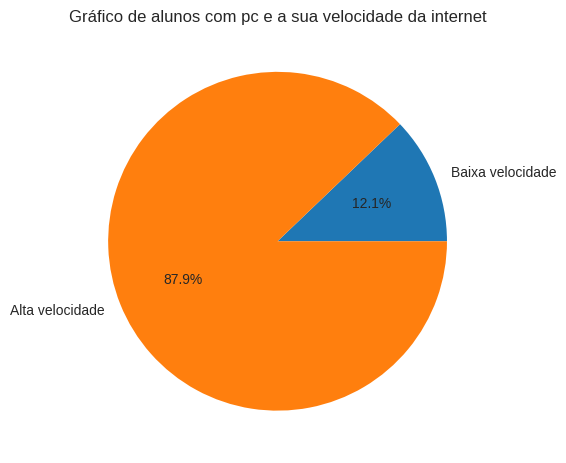

In [0]:
internet_low = df1.query('has_pc == "yes" & \
                            speed_internet == "low-speed"')
internet_high = df1.query('has_pc == "yes" &\
                            speed_internet == "high-speed"')
low = internet_low.shape[0]
high = internet_high.shape[0]

plt.pie(x=[low, high], labels=['Baixa velocidade', 'Alta velocidade'],
        autopct='%1.1f%%')
plt.title('Gráfico de alunos com pc e a sua velocidade da internet')
plt.show()

#### Velocidade de internet dos alunos que possuem pc e compatilham o seu pc

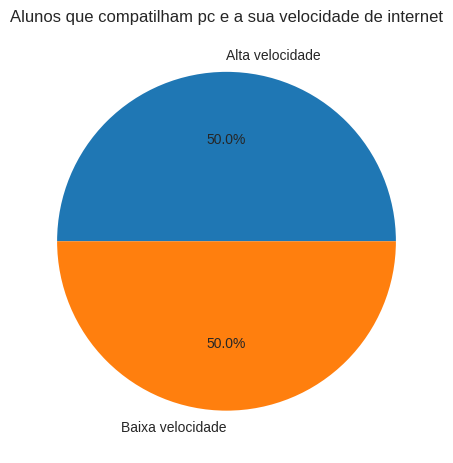

In [0]:
low = df1.query('share_pc == "yes" & speed_internet == "high-speed"').shape[0]
high = df1.query('share_pc == "yes" & speed_internet == "high-speed"').shape[0]

plt.title('Alunos que compatilham pc e a sua velocidade de internet')
plt.pie(x=[low, high], labels=['Alta velocidade', 'Baixa velocidade'], 
        autopct='%1.1f%%')
plt.show()

## Visualizando os dados quanto aos tipos de escola do ensino médio

### Excluindo os registros que possuem valores nulos na coluna school_type

In [0]:
df_school = df[df.school_type.isnull() == False]

,user_id,semester_id,class_number,course_id,course_name,inst_id_curr,inst_name_curr,high_school_name,school_type,shift,graduation_year,has_pc,has_internet,speed_internet,prev_exp_lang,language,worked,company_name,share_pc,year_started_work,year_stoped_work,other_degree,inst_name_prev,name_other_degree,year_started_prev_degree,year_stoped_prev_degree,sex,year_birth,civil_status,have_kids
0,2016-1#102#1088,2016-1,102,13,Física - Bacharelado,1,Universidade Federal do Amazonas,Escola Estadual Prof Ruth Prestes,public school,morning shift,2012.0,yes,yes,high-speed,yes,C,yes,Nokia,no,2015.0,2016.0,no,NaN,NaN,NaN,NaN,NaN,NaN,single,no
1,2016-1#102#1175,2016-1,102,8,Engenharia de Materiais,1,Universidade Federal do Amazonas,Fucapi,private school,morning shift,2015.0,yes,yes,high-speed,no,NaN,no,NaN,yes,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,single,no
2,2016-1#102#1278,2016-1,102,7,Engenharia Mecânica,1,Universidade Federal do Amazonas,Centro Educacional La Salle,private school,NaN,2012.0,yes,yes,high-speed,yes,C,yes,Editora Aufiero,no,2015.0,2016.0,no,NaN,NaN,NaN,NaN,NaN,NaN,single,no
3,2016-1#102#1279,2016-1,102,7,Engenharia Mecânica,1,Universidade Federal do Amazonas,Colegio Militar da Policia Militar,public school,morning shift,2015.0,yes,yes,high-speed,yes,"C,C++",no,NaN,yes,NaN,NaN,yes,IFAM,Analise e Desenvolvimento de Sistema,2016.0,2016.0,male,1997.0,single,no
5,2016-1#102#1281,2016-1,102,7,Engenharia Mecânica,1,Universidade Federal do Amazonas,IFRO - Instituto Federal de Rondônia,private school,afternoon shift,2015.0,yes,yes,low-speed,no,NaN,yes,CLIMEV,yes,2015.0,2015.0,no,NaN,NaN,NaN,NaN,NaN,NaN,single,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,2019-1#231#4246,2019-1,231,10,Engenharia Química,1,Universidade Federal do Amazonas,NaN,public school,afternoon shift,2018.0,no,NaN,NaN,no,NaN,no,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,male,2000.0,single,no
2562,2019-1#231#4337,2019-1,231,10,Engenharia Química,1,Universidade Federal do Amazonas,NaN,technical school,full-time school,2016.0,yes,yes,high-speed,no,NaN,no,NaN,yes,NaN,NaN,no,NaN,NaN,NaN,NaN,male,1999.0,single,no
2563,2019-1#231#4339,2019-1,231,10,Engenharia Química,1,Universidade Federal do Amazonas,NaN,public school,afternoon shift,2018.0,yes,yes,high-speed,no,NaN,no,NaN,yes,NaN,NaN,no,NaN,NaN,NaN,NaN,male,1999.0,single,no
2564,2019-1#231#4483,2019-1,231,10,Engenharia Química,1,Universidade Federal do Amazonas,NaN,public school,afternoon shift,2018.0,yes,yes,high-speed,no,NaN,no,NaN,yes,NaN,NaN,no,NaN,NaN,NaN,NaN,female,2001.0,single,no
